# **HW1: Regression** 
In *assignment 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict the number of dengue cases


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict the number of dengue cases in a different way than the basic part

# 1. Basic Part (60%)
In the first part, you need to implement the regression to predict the number of dengue cases

Please save the prediction result in a csv file **hw1_basic.csv**


## Import Packages

> Note: You **cannot** import any other package in the basic part

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

# from sklearn import linear_model
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split

## Global attributes
Define the global attributes

In [64]:
input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
output_dataroot = 'hw1_basic.csv' # Output file will be named as 'hw1_basic.csv'

input_datalist =  [] # Initial datalist, saved as numpy array
output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
             # The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']


You can add your own global attributes here


In [65]:
predict_datalist = []
shuffle_value = 0.8


## Load the Input File
First, load the basic input file **hw1_basic_input.csv**

Input data would be stored in *input_datalist*

In [66]:
# Read input csv to datalist
with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))
  
# with open(input_dataroot, newline='') as csvfile:
#   input_datalist = pd.read_csv('hw1_basic_input.csv')

# print(input_datalist.dtypes)
#print(input_datalist)

## Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions


### Step 1: Split Data
Split data in *input_datalist* into training dataset and validation dataset 



In [67]:

def SplitData(tmp, country_index):
  # global new_input_datalist
  shuffled_data = np.delete(tmp, 0, 0)
  # print(new_input_datalist)
  rows, columns = shuffled_data.shape
  x, y = np.array(shuffled_data.T[country_index]), np.array(shuffled_data.T[country_index+3])

  str_data = np.vstack((x, y)).T
  new_data = np.array(str_data, dtype=float)
  new_input_datalist = new_data
  training_data, vaildation_data = np.array(new_data[:int(rows*shuffle_value)]), np.array(new_data[int(rows*shuffle_value):])


  return training_data, vaildation_data, new_input_datalist
  #print(x_test.shape, x_vaild.shape, y_test.shape, y_vaild.shape)
  
  

### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [68]:
def PreprocessData(country_index):
    global predict_datalist
    data = []
    tmp = input_datalist
    predict_datalist = input_datalist
    for col in range(len(input_datalist)-1, -1, -1):
        if input_datalist[col, 1] == '' or input_datalist[col, 4] == '0':
            tmp = np.delete(tmp, col, 0) #將''刪除及0刪除
    for col in range(len(input_datalist)-1, -1, -1):
        if input_datalist[col, 1] == '':
            predict_datalist = np.delete(predict_datalist, col, 0)
    #print(tmp)
    for col in range(1, len(tmp)):
        #print(col)
        data.append(float(tmp[col, country_index])/float(tmp[col, country_index+3]))
        #print(data)

    data_mean, data_std = np.mean(data), np.std(data)
    lower, upper = data_mean - data_std*2, data_mean + data_std*2

    for index in range(len(data)-1, -1, -1):
        if data[index] >= upper or data[index] <= lower:
            #print(index, tmp[index+1], data[index])
            tmp = np.delete(tmp, index+1, 0) 

    for index in range(len(data)-1, -1, -1):
        if data[index] >= upper or data[index] <= lower:
            #print(index, tmp[index+1], data[index])
            predict_datalist = np.delete(predict_datalist, index+1, 0) 

    predict_datalist = np.delete(predict_datalist, 0, 0) 
    # print(predict_datalist)
    predict_datalist = np.array(predict_datalist, dtype='f')
    #print(predict_datalist)
            
    return tmp

  
  

### Step 3: Implement Regression
> Hint: You can use Matrix Inversion, or Gradient Descent to finish this part




In [69]:
def gradient(w_i, j, days, data, L):
    data_x, data_y = data[:, 0], data[:, 1]
    n = len(data_x)
    w_gradient_i = np.zeros(j+1+days)
    data_mean = np.mean(data_y)
    for i in range(n):
        x = data_x[i]
        y = data_y[i]
        x_power_list = np.power(x, np.arange(j+1)) #[1, x, x^2, ...]
        # print(x_power_list)
        #print(x_power_list.shape, w_i.shape)
        for k in range(days):
            if i-k < 0:
                x_power_list = np.append(x_power_list, data_mean)
            else:
                x_power_list = np.append(x_power_list, data_y[i-k-1])
        #print(x_power_list)
        # print(x_power_list.shape, w_gradient_i.shape, w_i.shape)
        
        for l in range(j+1+days):
            #print(l, j)
            w_gradient_i[l] = w_gradient_i[l] - (2/n)*x_power_list[l]*(y - w_i.dot(x_power_list.T))
        #print(w_i - w_gradient_i*L)

    return w_i - w_gradient_i*L




def Regression(data, j, days, alpha, repeats):
    w_i = []
    data_x, data_y = data[:, 0], data[:, 1]
    #print(data_x, data_y)
    w_i = np.zeros(j+1+days)

    for i in range(repeats):
        w_i = gradient(w_i, j, days, data, alpha)

    return w_i


### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [70]:
def find_solution(days, j, w_i, country_index):
    global predict_datalist
    #print(predict_datalist)
    pred = []
    #print(new_input_datalist)
    lengh = len(predict_datalist)
    N = 10
    for week in range(N):
        x_power_list = np.power(predict_datalist[lengh-N+week, country_index], np.arange(j+1))
        #mean = np.mean(vaildation_data[:,1])
        for k in range(days):
            if week-k <= 0:
                x_power_list = np.append(x_power_list, predict_datalist[lengh-N-(k-week)-1, country_index+3])
                #print(predict_datalist[lengh-N-(k-week)-1, country_index+3])
            else:
                x_power_list = np.append(x_power_list, pred[week-k-1])
        pred = np.append(pred, w_i.dot(x_power_list.T))

        
    return pred

### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be: 
```
3 2 1
```





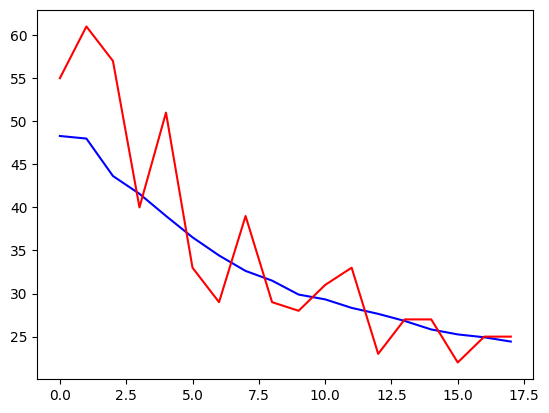

city A:mape 11.535241579951418 %
[0.00554626 0.12937091 0.4374644  0.3971708 ]


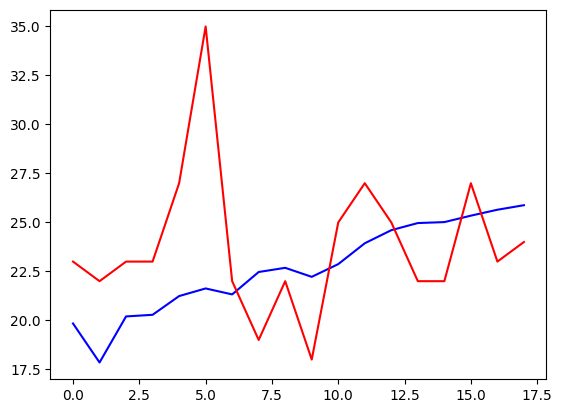

[0.00682933 0.09430751 0.00371443 0.36642051 0.24074489 0.10305099
 0.15071633]
city B:mape 13.227631179751661 %


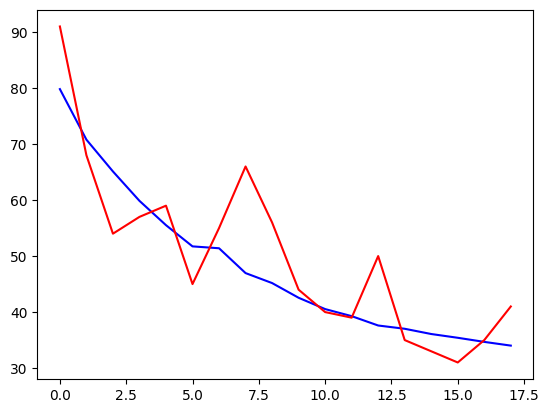

[0.00707227 0.20378053 0.45615888 0.35103907]
city C:mape 10.832220753774573 %


In [71]:
week = input_datalist[:,0]
#city A
alpha_a = 0.000000019
repeats_a = 6050
days = 2
w_i = []
training_data, vaildation_data, new_input_datalist = SplitData(PreprocessData(1), 1)
j = 1
w_i = Regression(training_data, j, days, alpha_a, repeats_a)
pred = []
#print(new_input_datalist)
N = len(vaildation_data)
for day in range(N):
    x_power_list = np.power(vaildation_data[day, 0], np.arange(j+1))
    #mean = np.mean(vaildation_data[:,1])
    for k in range(days):
        if day-k <= 0:
            x_power_list = np.append(x_power_list, new_input_datalist[len(new_input_datalist)-N-(k-day)-1, 1])
        else:
            x_power_list = np.append(x_power_list, pred[day-k-1])
    #print(x_power_list)
    pred = np.append(pred, w_i.dot(x_power_list.T))

plt.plot(range(N), pred, color ='blue')
plt.plot(range(N), new_input_datalist[len(new_input_datalist)-N:, 1], color ='red')
plt.show()

len_v = len(vaildation_data)
mape = 0
for it in range(len_v):
    mape += 1/len_v*abs(vaildation_data[it,1] - pred[it])/vaildation_data[it,1]
#print(w_i)
print("city A:mape", 100*mape, "%")
print(w_i)
cityA = find_solution(days, j, w_i, 1)


# city B
alpha_b = 0.00000065
repeats_b = 7100
days = 4
w_i = []
training_data, vaildation_data, new_input_datalist = SplitData(PreprocessData(2), 2)
j = 2
w_i = Regression(training_data, j, days, alpha_b, repeats_b)
pred = []
#print(new_input_datalist)
N = len(vaildation_data)
for day in range(N):
    x_power_list = np.power(vaildation_data[day, 0], np.arange(j+1))
    #mean = np.mean(vaildation_data[:,1])
    for k in range(days):
        if day-k <= 0:
            x_power_list = np.append(x_power_list, new_input_datalist[len(new_input_datalist)-N-(k-day)-1, 1])
        else:
            x_power_list = np.append(x_power_list, pred[day-k-1])
    pred = np.append(pred, w_i.dot(x_power_list.T))

plt.plot(range(N), pred, color ='blue')
plt.plot(range(N), new_input_datalist[len(new_input_datalist)-N:, 1], color ='red')
plt.show()

len_v = len(vaildation_data)
mape = 0
for it in range(len_v):
    mape += 1/len_v*abs(vaildation_data[it,1] - pred[it])/vaildation_data[it,1]


print(w_i)
print("city B:mape", 100*mape, "%")

cityB = find_solution(days, j, w_i, 2)


#city c
alpha_c = 0.0000002
repeats_c = 7000
days = 2
w_i = []
training_data, vaildation_data, new_input_datalist = SplitData(PreprocessData(3), 3)
j = 1
w_i = Regression(training_data, j, days, alpha_c, repeats_c)
pred = []
#print(new_input_datalist)
N = len(vaildation_data)
for day in range(N):
    x_power_list = np.power(vaildation_data[day, 0], np.arange(j+1))
    #mean = np.mean(vaildation_data[:,1])
    for k in range(days):
        if day-k <= 0:
            x_power_list = np.append(x_power_list, new_input_datalist[len(new_input_datalist)-N-(k-day)-1, 1])
        else:
            x_power_list = np.append(x_power_list, pred[day-k-1])
    pred = np.append(pred, w_i.dot(x_power_list.T))

plt.plot(range(N), pred, color ='blue')
plt.plot(range(N), new_input_datalist[len(new_input_datalist)-N:, 1], color ='red')
plt.show()

len_v = len(vaildation_data)
mape = 0
for it in range(len_v):
    mape += 1/len_v*abs(vaildation_data[it,1] - pred[it])/vaildation_data[it,1]
print(w_i)
print("city C:mape", 100*mape, "%")

cityC = find_solution(days, j, w_i, 3)

output_datalist = np.vstack([week[95:], cityA, cityB, cityC])

output_datalist = np.transpose(output_datalist)
  




## Write the Output File
Write the prediction to output csv
> Format: 'epiweek', 'CityA', 'CityB', 'CityC'

In [72]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# 2. Advanced Part (35%)
In the second part, you need to implement the regression in a different way than the basic part to help your predictions for the number of dengue cases

We provide you with two files **hw1_advanced_input1.csv** and **hw1_advanced_input2.csv** that can help you in this part

Please save the prediction result in a csv file **hw1_advanced.csv** 


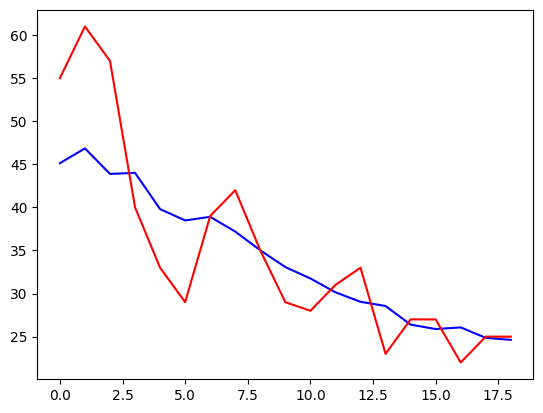

city A:mape 12.238148122412168 %
[0.00300158 0.01253085 0.07939683 0.26111678 0.23603566 0.20331465
 0.18621636]


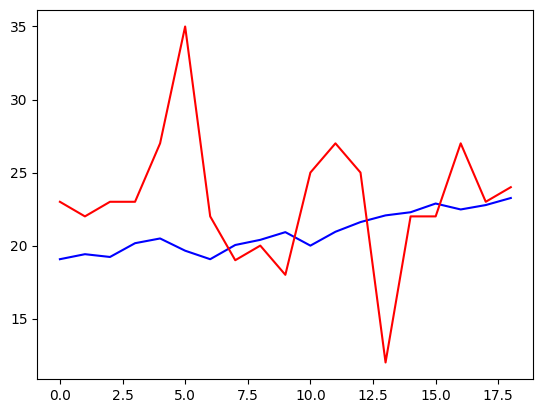

[ 0.24365575  0.55416528 -0.03661514  0.67245476  0.10516321  0.08065731
  0.07128896]
city B:mape 17.293799657664035 %


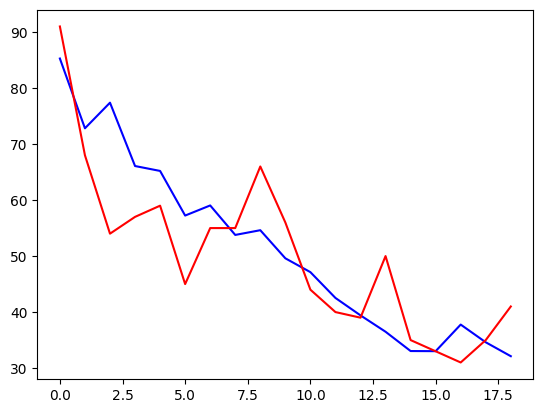

[0.01286675 0.03862348 0.01766536 0.49775048 0.35301341]
city C:mape 12.649569524784072 %


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
input_datalist =  [] # Initial datalist, saved as numpy array
advanced_input_dataroot = 'hw1_advanced_input1.csv' # Input file named as 'hw1_basic_input.csv'
advanced_output_dataroot = 'hw1_advanced.csv' # Output file will be named as 'hw1_basic.csv'

advanced_input_datalist =  [] # Initial datalist, saved as numpy array
advanced_output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
# The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']
shuffle_value = 0.8

with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))
with open(advanced_input_dataroot, newline='') as csvfile:
  advanced_input_datalist = np.array(list(csv.reader(csvfile)))


def SplitData_advanced(tmp, country_index):
  shuffled_data = np.delete(tmp, 0, 0)
  rows, columns = shuffled_data.shape
  x, y = np.array(shuffled_data.T[country_index]), np.array(shuffled_data.T[country_index+3])

  str_data = np.vstack((x, y)).T
  new_data = np.array(str_data, dtype=float)
  new_input_datalist = new_data
  training_data, vaildation_data = np.array(new_data[:int(rows*shuffle_value)]), np.array(new_data[int(rows*shuffle_value):])


  return training_data, vaildation_data, new_input_datalist



def PreprocessData_advanced(country_index):
    global predict_datalist
    data = []
    delete_temp = input_datalist

    #複製一份input_datalist，之後用來刪除溫度outlier
    for col in range(len(input_datalist)-1, -1, -1):
        if input_datalist[col, 1] == '' or input_datalist[col, 4] == '0':
            delete_temp = np.delete(delete_temp, col, 0) #將''刪除及0刪除

    #將溫度去除，人數與降雨合併
    people, precipitation = np.array(input_datalist[:, 4:]), np.array(advanced_input_datalist[:, :])
    tmp = np.hstack((precipitation, people))
    predict_datalist = tmp
    #print(tmp)

    for col in range(len(input_datalist)-1, -1, -1):
        if input_datalist[col, 4] == '0':
            tmp = np.delete(tmp, col, 0) #將0刪除

    #print(tmp)
    for col in range(1, len(delete_temp)):
        #print(col)
        data.append(float(delete_temp[col, country_index])/float(delete_temp[col, country_index+3]))
        #print(data)
    N = len(data)

    #刪除outiler
    data_mean, data_std = np.mean(data), np.std(data)
    lower, upper = data_mean - data_std*2, data_mean + data_std*2

    for index in range(N-1, -1, -1):
        if data[index] >= upper or data[index] <= lower:
            #print(index, tmp[index+1], data[index])
            tmp = np.delete(tmp, index+1, 0) 
            predict_datalist = np.delete(predict_datalist, index+1, 0) 

    predict_datalist = np.delete(predict_datalist, 0, 0) 
    # print(predict_datalist)
    predict_datalist = np.array(predict_datalist, dtype='f')
    #print(predict_datalist)
            
    return tmp

def gradient_advanced(w_i, j, days, data, L):
    data_x, data_y = data[:, 0], data[:, 1]
    n = len(data_x)
    w_gradient_i = np.zeros(j+1+days)
    data_mean = np.mean(data_y)
    for i in range(n):
        x = data_x[i]
        y = data_y[i]
        x_power_list = np.power(x, np.arange(j+1)) #[1, x, x^2, ...]
        # print(x_power_list)
        #print(x_power_list.shape, w_i.shape)
        for k in range(days):
            if i-k < 0:
                x_power_list = np.append(x_power_list, data_mean)
            else:
                x_power_list = np.append(x_power_list, data_y[i-k-1])
        #print(x_power_list)
        # print(x_power_list.shape, w_gradient_i.shape, w_i.shape)
        
        for l in range(j+1+days):
            #print(l, j)
            w_gradient_i[l] = w_gradient_i[l] - (2/n)*x_power_list[l]*(y - w_i.dot(x_power_list.T))
        #print(w_i - w_gradient_i*L)

    return w_i - w_gradient_i*L


def Regression_advanced(data, j, days, alpha, repeats):
    w_i = []
    data_x, data_y = data[:, 0], data[:, 1]
    #print(data_x, data_y)
    w_i = np.zeros(j+1+days)

    for i in range(repeats):
        w_i = gradient_advanced(w_i, j, days, data, alpha)

    return w_i

  
def find_solution_advanced(days, j, w_i, country_index):
    global predict_datalist
    #print(predict_datalist)
    pred = []
    #print(new_input_datalist)
    lengh = len(predict_datalist)
    N = 10
    for week in range(N):
        x_power_list = np.power(predict_datalist[lengh-N+week, country_index], np.arange(j+1))
        #mean = np.mean(vaildation_data[:,1])
        for k in range(days):
            if week-k <= 0:
                x_power_list = np.append(x_power_list, predict_datalist[lengh-N-(k-week)-1, country_index+3])
                #print(predict_datalist[lengh-N-(k-week)-1, country_index+3])
            else:
                x_power_list = np.append(x_power_list, pred[week-k-1])
        pred = np.append(pred, w_i.dot(x_power_list.T))

        
    return pred


week = input_datalist[:,0]
#city A
alpha_a = 0.000000012
repeats_a = 7400
days = 4
w_i = []
training_data, vaildation_data, new_input_datalist = SplitData_advanced(PreprocessData_advanced(1), 1)
j = 2
w_i = Regression_advanced(training_data, j, days, alpha_a, repeats_a)
pred = []
#print(new_input_datalist)
N = len(vaildation_data)
for day in range(N):
    x_power_list = np.power(vaildation_data[day, 0], np.arange(j+1))
    #mean = np.mean(vaildation_data[:,1])
    for k in range(days):
        if day-k <= 0:
            x_power_list = np.append(x_power_list, new_input_datalist[len(new_input_datalist)-N-(k-day)-1, 1])
        else:
            x_power_list = np.append(x_power_list, pred[day-k-1])
    #print(x_power_list)
    pred = np.append(pred, w_i.dot(x_power_list.T))

plt.plot(range(N), pred, color ='blue')
plt.plot(range(N), new_input_datalist[len(new_input_datalist)-N:, 1], color ='red')
plt.show()

len_v = len(vaildation_data)
mape = 0
for it in range(len_v):
    mape += 1/len_v*abs(vaildation_data[it,1] - pred[it])/vaildation_data[it,1]
#print(w_i)
print("city A:mape", 100*mape, "%")
print(w_i)
cityA = find_solution_advanced(days, j, w_i, 1)


#city B
alpha_b = 0.00002
repeats_b = 7800
days = 4
w_i = []
training_data, vaildation_data, new_input_datalist = SplitData_advanced(PreprocessData_advanced(2), 2)
j = 2
w_i = Regression_advanced(training_data, j, days, alpha_b, repeats_b)
pred = []
#print(new_input_datalist)
N = len(vaildation_data)
for day in range(N):
    x_power_list = np.power(vaildation_data[day, 0], np.arange(j+1))
    #mean = np.mean(vaildation_data[:,1])
    for k in range(days):
        if day-k <= 0:
            x_power_list = np.append(x_power_list, new_input_datalist[len(new_input_datalist)-N-(k-day)-1, 1])
        else:
            x_power_list = np.append(x_power_list, pred[day-k-1])
    pred = np.append(pred, w_i.dot(x_power_list.T))

plt.plot(range(N), pred, color ='blue')
plt.plot(range(N), new_input_datalist[len(new_input_datalist)-N:, 1], color ='red')
plt.show()

len_v = len(vaildation_data)
mape = 0
for it in range(len_v):
    mape += 1/len_v*abs(vaildation_data[it,1] - pred[it])/vaildation_data[it,1]


print(w_i)
print("city B:mape", 100*mape, "%")

cityB = find_solution_advanced(days, j, w_i, 2)


#city c
alpha_c = 0.0000002655
repeats_c = 8300
days = 2
w_i = []
training_data, vaildation_data, new_input_datalist = SplitData_advanced(PreprocessData_advanced(3), 3)
j = 2
w_i = Regression_advanced(training_data, j, days, alpha_c, repeats_c)
pred = []
#print(new_input_datalist)
N = len(vaildation_data)
for day in range(N):
    x_power_list = np.power(vaildation_data[day, 0], np.arange(j+1))
    #mean = np.mean(vaildation_data[:,1])
    for k in range(days):
        if day-k <= 0:
            x_power_list = np.append(x_power_list, new_input_datalist[len(new_input_datalist)-N-(k-day)-1, 1])
        else:
            x_power_list = np.append(x_power_list, pred[day-k-1])
    pred = np.append(pred, w_i.dot(x_power_list.T))

plt.plot(range(N), pred, color ='blue')
plt.plot(range(N), new_input_datalist[len(new_input_datalist)-N:, 1], color ='red')
plt.show()

len_v = len(vaildation_data)
mape = 0
for it in range(len_v):
    mape += 1/len_v*abs(vaildation_data[it,1] - pred[it])/vaildation_data[it,1]
print(w_i)
print("city C:mape", 100*mape, "%")

cityC = find_solution_advanced(days, j, w_i, 3)

advanced_output_datalist = np.vstack([week[95:], cityA, cityB, cityC])

advanced_output_datalist = np.transpose(advanced_output_datalist)
#print(advanced_output_datalist)

with open(advanced_output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in advanced_output_datalist:
    writer.writerow(row)

# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered 
*   Summarize your work and your reflections 
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)